In [4]:
import requests
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# URLs des livres
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",  # Alice in Wonderland
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",  # Through the Looking Glass
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"  # A Tangled Tale
]

# Fonction pour charger et nettoyer les textes
def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text
        
        # Trouver le début et la fin du texte principal
        start_idx = text.find('START')
        end_idx = text.find('*** END')
        
        if start_idx != -1 and end_idx != -1:
            text = text[start_idx:end_idx]
        
        # Nettoyer le texte
        text = re.sub(r'[^\w\s]', ' ', text.lower())
        corpus.append(text)
    
    return corpus

# Charger les textes
corpus = load_texts(urls)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ludovicveltz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


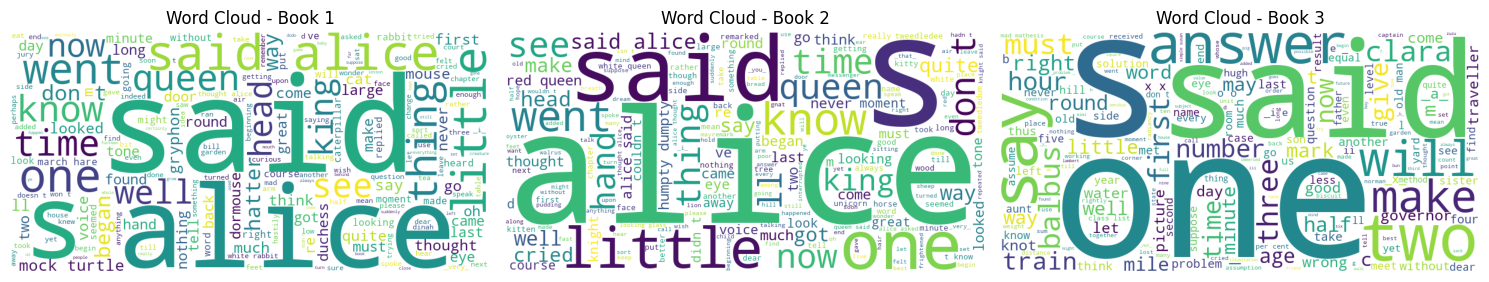

In [5]:
# 1. Création des nuages de mots
plt.figure(figsize=(15, 5))
for i, text in enumerate(corpus):
    plt.subplot(1, 3, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Word Cloud - Book {i+1}')
plt.tight_layout()
plt.show()


Livre 1 - 5 mots les plus fréquents:


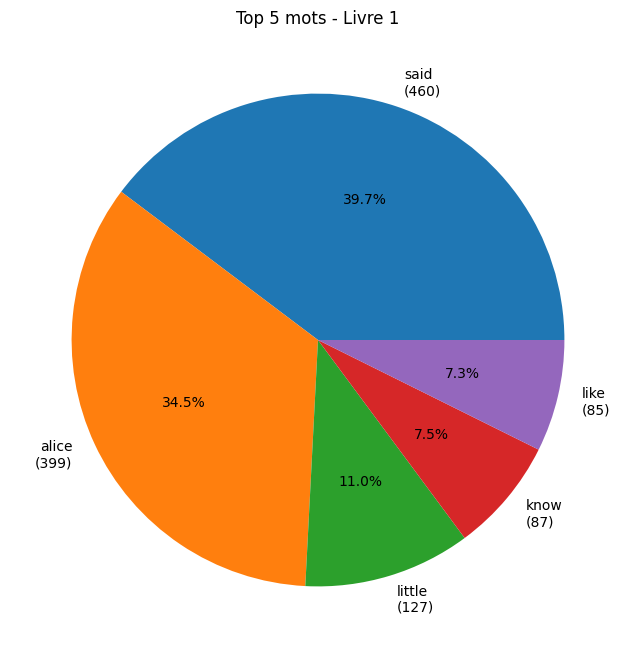


Livre 2 - 5 mots les plus fréquents:


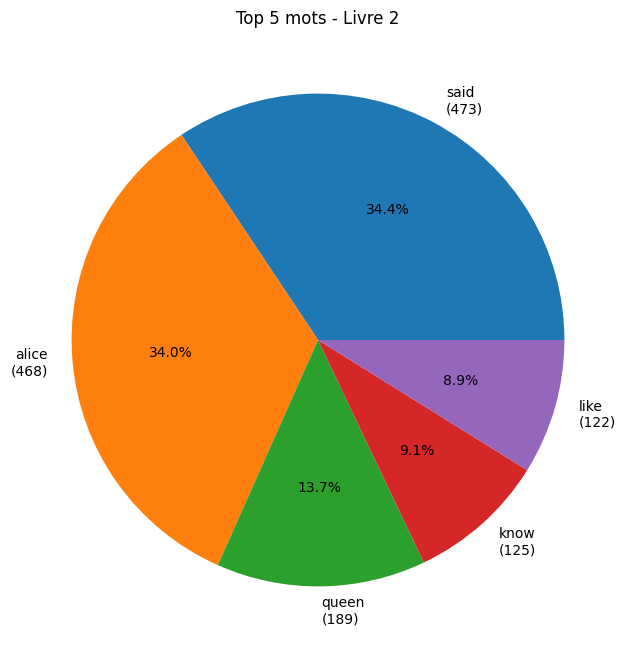


Livre 3 - 5 mots les plus fréquents:


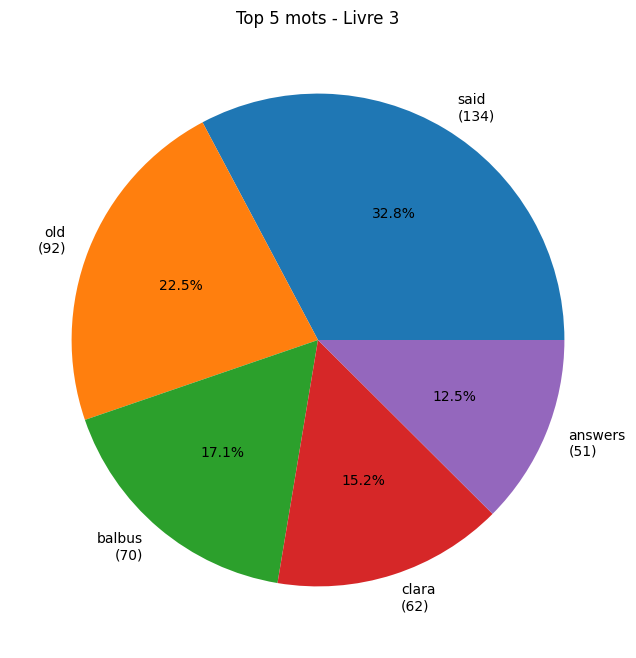

In [6]:
# 2. Analyse BoW
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()

# Afficher les 5 mots les plus fréquents pour chaque livre
for i in range(len(corpus)):
    print(f"\nLivre {i+1} - 5 mots les plus fréquents:")
    word_freq = [(words[j], X.toarray()[i][j]) for j in range(len(words))]
    word_freq.sort(key=lambda x: x[1], reverse=True)
    
    # Créer le graphique en camembert
    top_5 = word_freq[:5]
    labels = [f"{word}\n({freq})" for word, freq in top_5]
    sizes = [freq for word, freq in top_5]
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Top 5 mots - Livre {i+1}')
    plt.show()


Livre 1 - 5 mots les plus importants (TF-IDF):


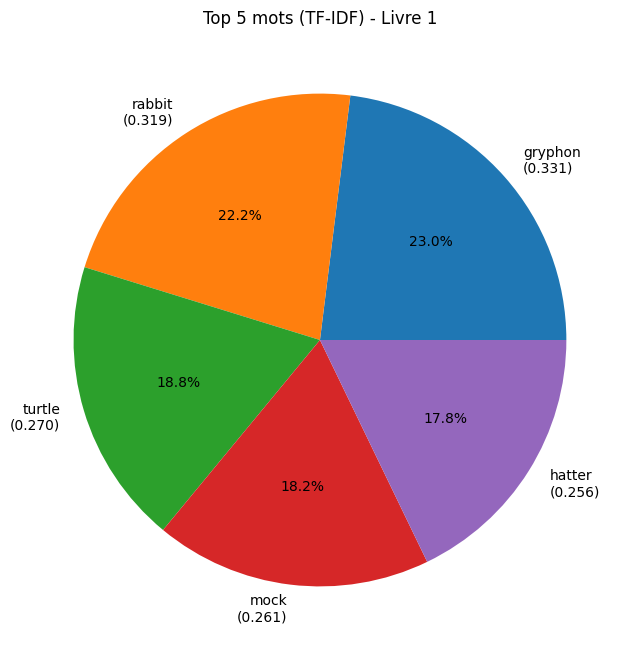


Livre 2 - 5 mots les plus importants (TF-IDF):


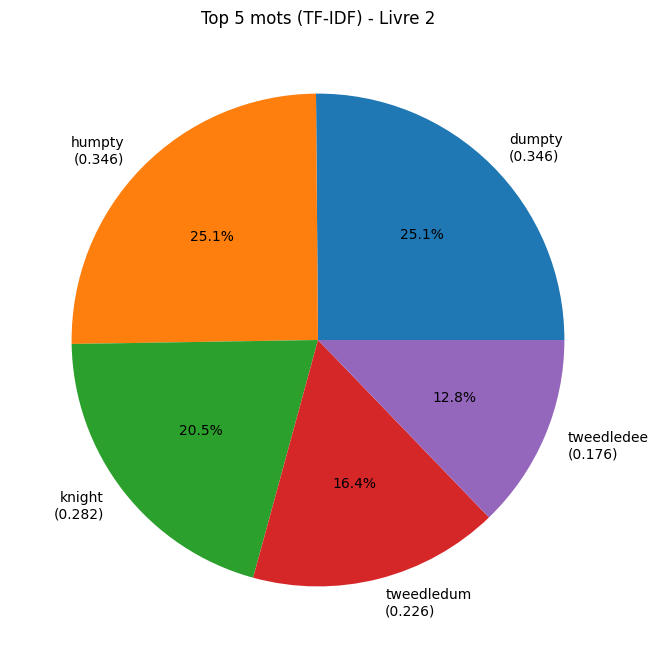


Livre 3 - 5 mots les plus importants (TF-IDF):


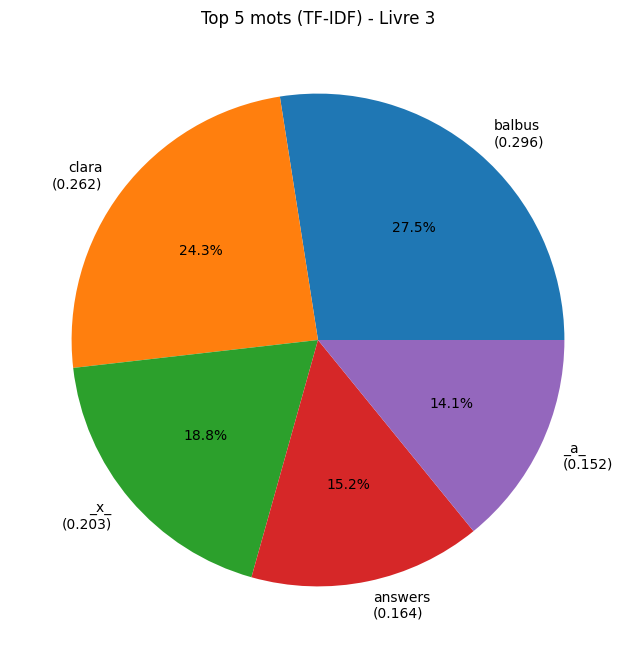

: 

In [ ]:
# 3. Analyse TF-IDF
tfidf = TfidfVectorizer(min_df=1, max_df=2, stop_words='english')
X_tfidf = tfidf.fit_transform(corpus)
words_tfidf = tfidf.get_feature_names_out()

# Afficher les 5 mots les plus importants selon TF-IDF
for i in range(len(corpus)):
    print(f"\nLivre {i+1} - 5 mots les plus importants (TF-IDF):")
    word_importance = [(words_tfidf[j], X_tfidf.toarray()[i][j]) for j in range(len(words_tfidf))]
    word_importance.sort(key=lambda x: x[1], reverse=True)
    
    # Créer le graphique en camembert
    top_5 = word_importance[:5]
    labels = [f"{word}\n({freq:.3f})" for word, freq in top_5]
    sizes = [freq for word, freq in top_5]
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Top 5 mots (TF-IDF) - Livre {i+1}')
    plt.show()


Analyse des résultats :

Les mots les plus fréquents sont généralement peu informatifs car ce sont souvent :
- Des noms de personnages principaux ("alice")
- Des verbes d'action communs ("said", "went")
- Des mots descriptifs généraux ("time", "little")

Ces résultats sont largement prévisibles car :
- Dans un roman, les noms des personnages principaux sont naturellement répétés
- Les verbes d'action basiques sont nécessaires à la narration
- Ces mots fréquents ne nous donnent pas d'insights profonds sur le contenu unique de chaque livre

C'est précisément pour cette raison que le TF-IDF est plus utile, car il permet de mettre en évidence les mots qui sont vraiment distinctifs pour chaque document, plutôt que simplement fréquents dans tous les textes.